In [3]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [32]:
# load the dataset
df = pd.read_csv("energy_usage_sample.csv", parse_dates=["Timestamp"])

In [ ]:
# the first few rows of the dataset

print(df.head())

            Timestamp        Appliance  Usage_kWh         Room    Mode  \
0 2025-07-01 00:00:00           Fridge       1.31  Living Room      On   
1 2025-07-01 01:00:00  Washing Machine       0.19      Kitchen      On   
2 2025-07-01 02:00:00           Geyser       0.73     Bathroom  Freeze   
3 2025-07-01 03:00:00  Washing Machine       1.90  Living Room    Cool   
4 2025-07-01 04:00:00  Washing Machine       1.19  Living Room    Wash   

   Temp(C)  Cost(INR)  
0       20       9.83  
1       34       1.42  
2       34       5.48  
3       26      14.25  
4       34       8.92  


In [7]:
# Step 2: Data Preprocessing

df['Hour'] = df['Timestamp'].dt.hour
df['Date'] = df['Timestamp'].dt.date



Text(0, 0.5, 'Usage (kWh)')

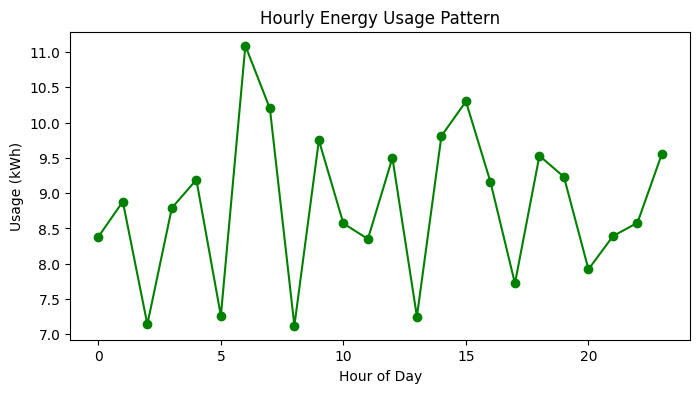

In [ ]:
# Hourly Energy Usage line chart

fig, ax = plt.subplots(figsize=(8, 4))
hourly_usage = df.groupby('Hour')['Usage_kWh'].sum()
ax.plot(hourly_usage.index, hourly_usage.values, marker='o', color='green')
ax.set_title("Hourly Energy Usage Pattern")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Usage (kWh)")


Text(0.5, 1.0, 'Usage Distribution by Appliance')

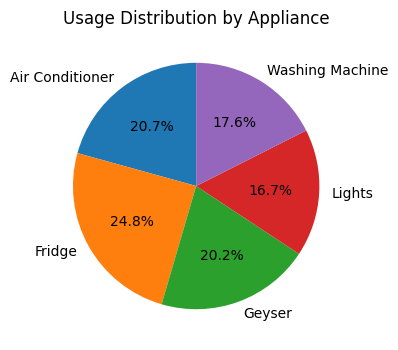

In [ ]:
# Appliance Usage Pie Chart

appliance_usage = df.groupby('Appliance')['Usage_kWh'].sum()
fig, axs = plt.subplots(figsize=(9, 4))
axs.pie(appliance_usage, labels=appliance_usage.index, autopct='%1.1f%%', startangle=90)
axs.set_title("Usage Distribution by Appliance")


Text(0.5, 1.0, 'Room vs Hourly Energy Heatmap')

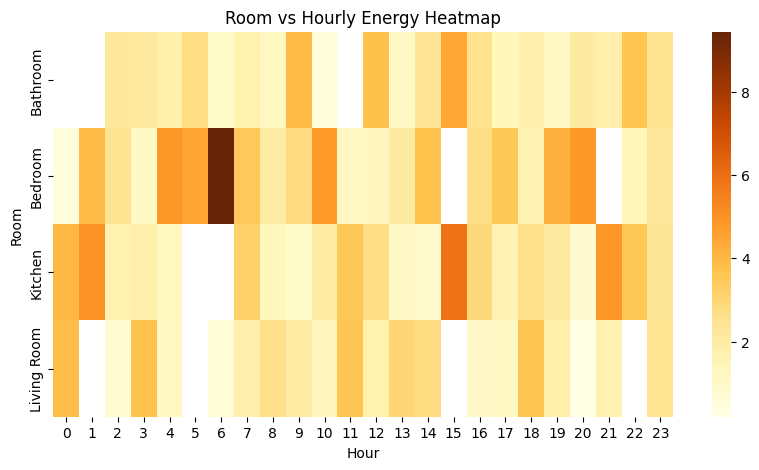

In [ ]:
 # Room vs Hour Heatmap

fig, axs = plt.subplots(figsize=(10, 5))
heatmap_data = df.pivot_table(values='Usage_kWh', index='Room', columns='Hour', aggfunc='sum')
sns.heatmap(heatmap_data, ax=axs, cmap="YlOrBr")
axs.set_title("Room vs Hourly Energy Heatmap")


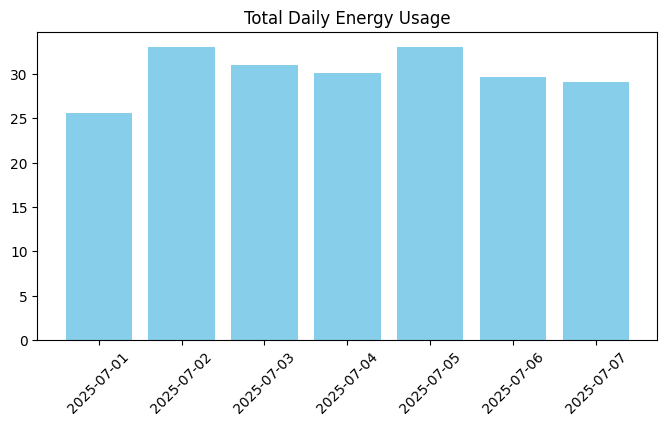

In [23]:
# Daily Usage Bar Chart

daily_usage = df.groupby('Date')['Usage_kWh'].sum()
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(daily_usage.index.astype(str), daily_usage.values, color='skyblue')
ax.set_title("Total Daily Energy Usage")
ax.tick_params(axis='x', rotation=45)

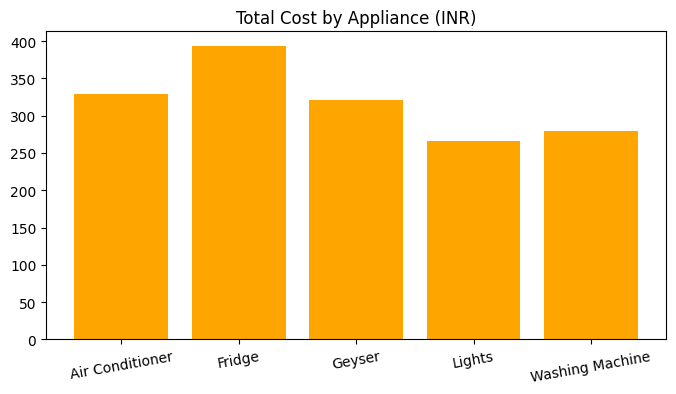

In [ ]:
# Cost by Appliance

cost_by_appliance = df.groupby('Appliance')['Cost(INR)'].sum()
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(cost_by_appliance.index, cost_by_appliance.values, color='orange')
ax.set_title("Total Cost by Appliance (INR)")
ax.tick_params(axis='x', rotation=10)

C:\Users\ANIKET\AppData\Local\Temp\ipykernel_10764\3286190105.py:16: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
c:\Users\ANIKET\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


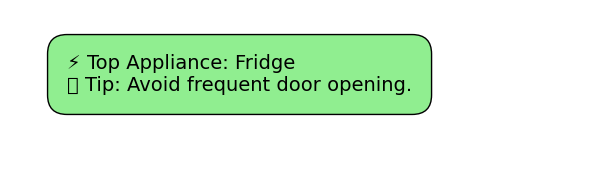

In [ ]:
 # Smart Tip Generator
tips = {
    "Air Conditioner": "Set to 25°C & use sleep mode.",
    "Lights": "Use LED & motion sensors.",
    "Geyser": "Limit usage to 10 minutes.",
    "Fridge": "Avoid frequent door opening.",
    "Washing Machine": "Use eco mode & full loads."
}
top_appliance = appliance_usage.idxmax()

fig_tip, ax_tip = plt.subplots(figsize=(6, 2))
ax_tip.axis('off')
ax_tip.text(0.1, 0.5, f"⚡ Top Appliance: {top_appliance}\n💡 Tip: {tips[top_appliance]}",
            fontsize=14, bbox=dict(facecolor='lightgreen', boxstyle='round,pad=1'))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
# Predict Future Usage with Linear Regression
# Aggregate by Day

daily_df = df.groupby('Date')['Usage_kWh'].sum().reset_index()
daily_df['Day_Index'] = np.arange(len(daily_df))

In [ ]:
# Train Linear Regression Model

X = daily_df[['Day_Index']]
y = daily_df['Usage_kWh']
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [40]:
# Forecast Next 10 Days

future_index = np.arange(len(daily_df), len(daily_df) + 10).reshape(-1, 1)
future_usage = model.predict(future_index)
future_dates = pd.date_range(start=daily_df['Date'].max() + pd.Timedelta(days=1), periods=10)

c:\Users\ANIKET\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\Users\ANIKET\AppData\Local\Temp\ipykernel_10764\343109043.py:11: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\ANIKET\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


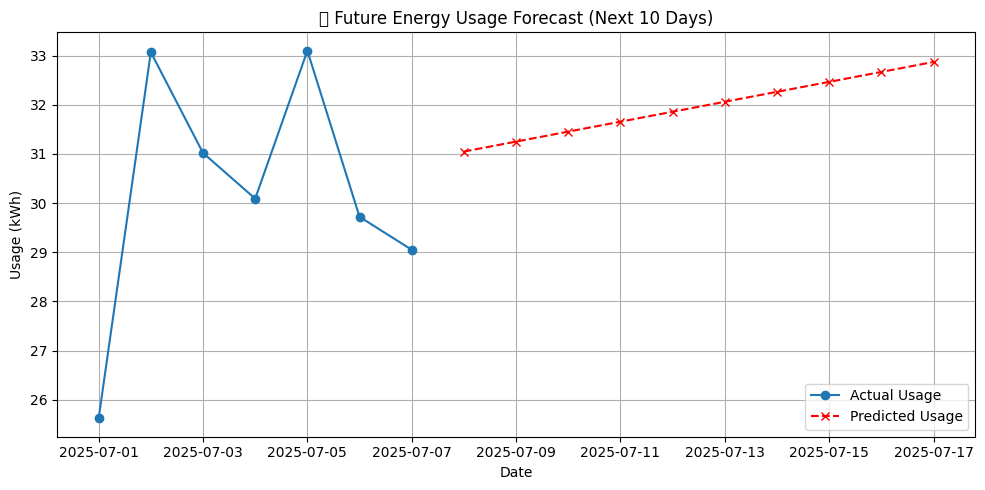

In [41]:
# Plot Forecast vs Actual

plt.figure(figsize=(10, 5))
plt.plot(daily_df['Date'], daily_df['Usage_kWh'], label='Actual Usage', marker='o')
plt.plot(future_dates, future_usage, label='Predicted Usage', linestyle='--', color='red', marker='x')
plt.title("🔮 Future Energy Usage Forecast (Next 10 Days)")
plt.xlabel("Date")
plt.ylabel("Usage (kWh)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
# Display Forecast

forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Usage_kWh': np.round(future_usage, 2)
})
print("\n📊 Predicted Energy Usage for Next 10 Days:\n")
print(forecast_df)


📊 Predicted Energy Usage for Next 10 Days:

        Date  Predicted_Usage_kWh
0 2025-07-08                31.05
1 2025-07-09                31.25
2 2025-07-10                31.45
3 2025-07-11                31.66
4 2025-07-12                31.86
5 2025-07-13                32.06
6 2025-07-14                32.26
7 2025-07-15                32.47
8 2025-07-16                32.67
9 2025-07-17                32.87
